In [267]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Getting AR model 

**Generate white noise:** 
White noise is a sequence of random variables drawn from normal distribution with mean zero and variance one.

**Initialize the time series with zeros:** 
Initializes time series with zeros

**Set initial values:** 
It sets initial values of the time series. Since AR-model of order 'p' requires the previous 'p' values to generate the next value, the initial 'p' values are set 
randomly with constant term 'c'

**Generate values for the AR(p) process:**
Using the formula:
**yt[i] = c + phi * yt[i - 1] + eps[i]**,
the function computes values for the autoregressive process. Each value is dependent on the previous 'p' values and white noise.


In [268]:
def get_ar_model(c, p, n, phi, burnin=0):
    """
        Function get_ar_model generates values for an autoregressive (AR) time series
    model of order p
            Arguments:
                - c-- parameter represents the constant term of the AR model
                - p-- parameter denotes the order of autoregressive model
                - n-- number of values to generate
                - phi-- parameter represents the autoregressive coefficient
                - burnin -- number of initial values to discard

        Returns generated values for the AR model 
    """
    
    # Generate white noise
    np.random.seed(0)
    eps = np.random.normal(size=n + burnin)

    # Initialize the time series with zeros
    yt = np.zeros(n + burnin)

    # Set initial values
    for i in range(p):
        yt[i] = c + eps[i]
        
    #print("Setting initial 'p' value\n", yt, "\n" )

    # Generate values for the AR(p) process
    for i in range(p, n + burnin):
        yt[i] = c + phi * yt[i - 1] + eps[i]
        
    #print("Setting other values of time series\n",yt)
        
    return yt[burnin:]

In [269]:
def plot_acf_pacf(data, lags=40):
    fig, ax = plt.subplots(2, figsize=(10, 6))
    sm.graphics.tsa.plot_acf(data, lags=lags, ax=ax[0], zero= False)
    sm.graphics.tsa.plot_pacf(data, lags=lags, ax=ax[1], zero= False)
    ax[0].set_title('Autocorrection Function (ACF)')
    ax[1].set_title('Partial Autocorrection Function (PACF)')
    plt.tight_layout()
    plt.show()


In [270]:
n = 5000
yt_ar1 = get_ar_model(c=18, p=1, n=n, phi=0.6)

In [271]:
def calculate_acf_pacf(data, lags=40):
    acf_values = sm.tsa.acf(data, nlags=lags)
    pacf_values = sm.tsa.pacf(data, nlags=lags)
    return acf_values, pacf_values

calculate_acf_pacf(yt_ar1)

(array([ 1.00000000e+00,  5.97246668e-01,  3.47164845e-01,  1.89932261e-01,
         9.87463282e-02,  5.56666058e-02,  3.31568368e-02,  2.28799892e-02,
         8.92825094e-03, -3.64386713e-03, -1.74374337e-02, -3.82600841e-02,
        -3.06295547e-02, -2.48924894e-02, -2.66779728e-02, -3.46115735e-02,
        -3.15983036e-02, -2.13384032e-02, -1.88457298e-02, -1.43858666e-02,
        -6.42298546e-03, -1.24722367e-02, -2.17623979e-03,  9.84024795e-03,
        -5.24470192e-03, -5.08267820e-03,  3.87527979e-03, -4.91941459e-03,
        -2.16859965e-02, -2.71416974e-02, -1.29693805e-02,  2.26945713e-03,
         9.09969337e-03,  1.51654970e-02,  1.74130324e-02,  7.96032028e-03,
         3.43091771e-05,  3.80826825e-03,  1.13339324e-02,  1.07967311e-02,
         1.45376643e-02]),
 array([ 1.00000000e+00,  5.97366142e-01, -1.48371079e-02, -1.80964772e-02,
        -6.50612614e-03,  8.38789974e-03,  2.34171242e-03,  4.32727660e-03,
        -1.04377364e-02, -9.25756801e-03, -1.50405178e-02, -2

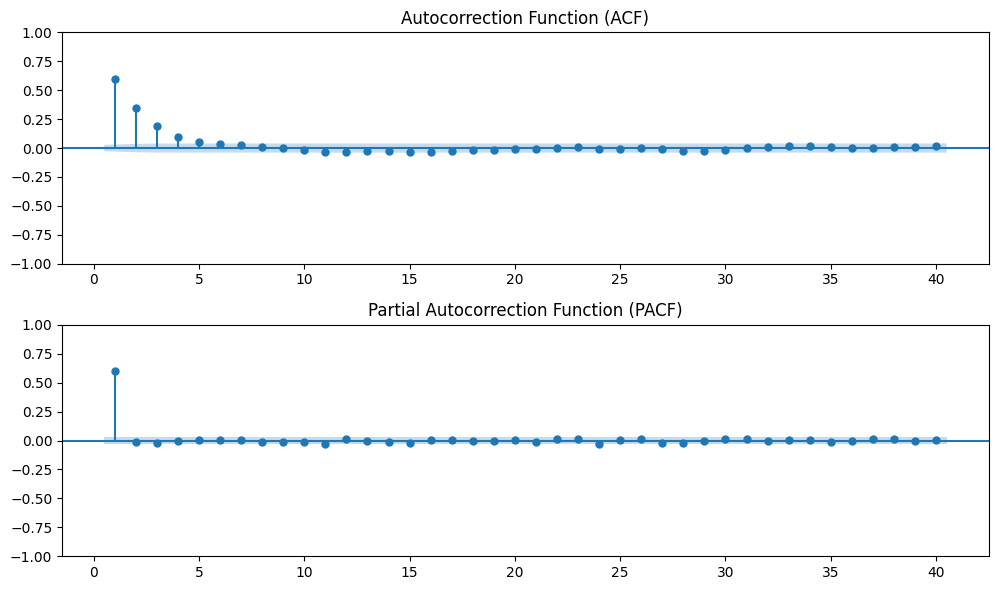

In [272]:
plot_acf_pacf(yt_ar1)

For phi = -0.7:


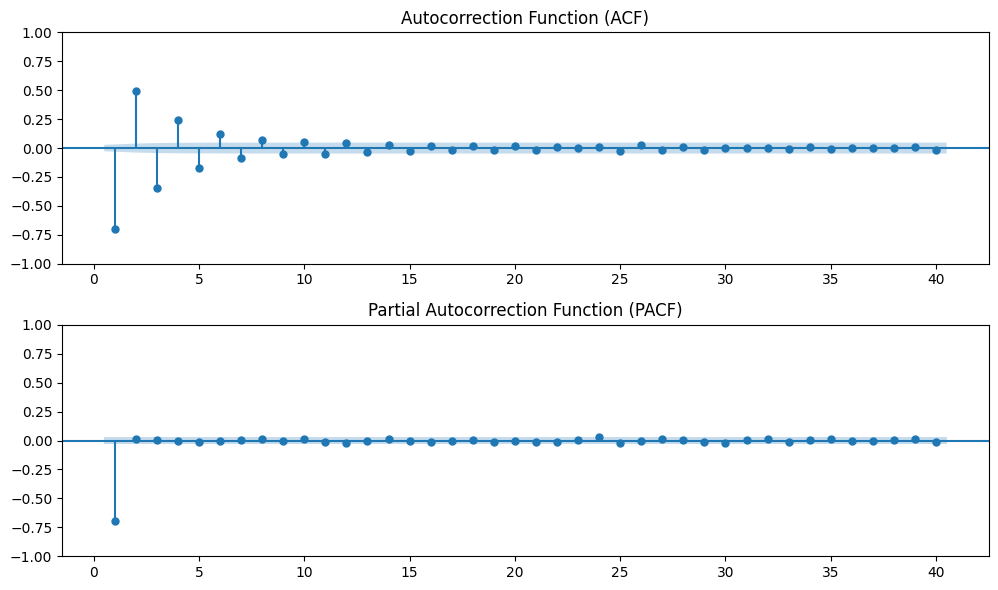

For phi = -0.8:


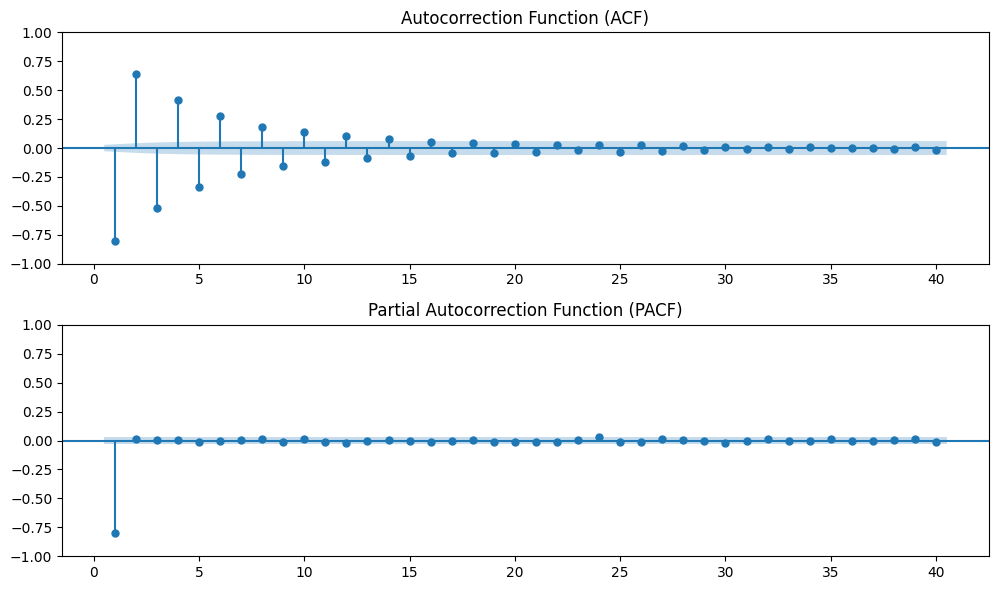

For phi = -0.9:


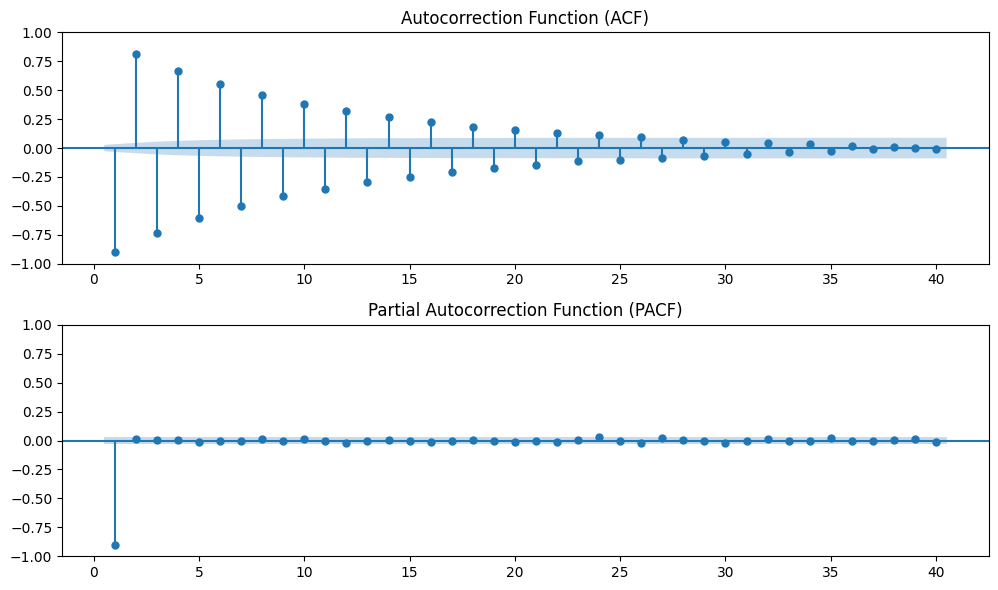

In [297]:
phis = [-0.7, -0.8, -0.9]
for phi in phis:
    yt_ar1 = get_ar_model(c= 18, p=1, n=n, phi=phi)
    print(f"For phi = {phi}:")
    plot_acf_pacf(yt_ar1)

In [274]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss

In [290]:
import warnings
warnings.filterwarnings("ignore")

# Are time series stationary or non-stationary?

***Augmented Dickey-Fuller (ADF) Test:***

> - Null Hypothesis (H0): The time series has a unit root, indicating it is non-stationary.
> - Alternative Hypothesis (H1): The time series does not have a unit root, indicating it is stationary.
> - If the p-value obtained from the test is less than a chosen significance level (typically 0.05), we reject the null hypothesis. In other words, if p-value < 0.05, we can consider the series as stationary; otherwise, we fail to reject the null hypothesis, suggesting that the series is non-stationary.
Example interpretation:

 - If adf_result[1] < 0.05, then the series is likely stationary.
 - If adf_result[1] >= 0.05, then the series is likely non-stationary.

***KPSS Test:***

> - Null Hypothesis (H0): The time series is stationary around a deterministic trend.
> - Alternative Hypothesis (H1): The time series has a unit root, indicating it is non-stationary.
> - If the p-value obtained from the test is less than a chosen significance level (typically 0.05), we reject the null hypothesis. In other words, if p-value < 0.05, we consider the series as non-stationary; otherwise, we fail to reject the null hypothesis, suggesting that the series is stationary.
Example interpretation:

 - If kpss_result[1] < 0.05, then the series is likely non-stationary.
 - If kpss_result[1] >= 0.05, then the series is likely stationary.

In [296]:
phis = [-0.7, -0.8, -0.9, 1]

for phi in phis:
    model = get_ar_model(c=18, p=1, n=n, phi=phi)
    ljung_box = acorr_ljungbox(model, lags=[40], return_df=True)
    adf_result = adfuller(model)
    kpss_result = kpss(model)
    
    if adf_result[1] < 0.05 or kpss_result[1] > 0.05:
        print("The time series for phi =", phi, "is stationary.")
    else:
        print("The time series for phi =", phi, "is non-stationary.")

    
    

The time series for phi = -0.7 is stationary.
The time series for phi = -0.8 is stationary.
The time series for phi = -0.9 is stationary.
The time series for phi = 1 is non-stationary.


****When phi>=1 then our series is non-stationary****